<img src="rose.jpg">

# Continued...

> In practice, it's not uncommon for a tree to have 10 splits between the top level (all loan applicants) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer applicants. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of applicants. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have 1024 groups of applicants by the time we get to the 10th level.

> When we divide the applicants amongst many leaves, we also have fewer applicants in each leaf. Leaves with very few applicants will more likely make exact classification, but they may make very unreliable classifications for new data (because each prediction is based on only a few applicants).

> This is a phenomenon called **overfitting**, where a model **matches the training data almost perfectly, but does poorly in validation and other new data.** On the flip side, if we make our tree very shallow, it doesn't divide up the applicants into very distinct groups.

> At an extreme, if a tree divides applicants into only 2 or 4, each group still has a wide variety of applicants. Resulting classifications may be wrong for most applicants, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

> Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.

<center><img src="18.png">

## Bias & Variance

---

<center><img src="20.jpg">

Both **bias** and **variance** are forms of prediction error in machine learning.

Typically, we can reduce error from bias but might increase error from variance as a result, or vice versa.

This trade-off between too simple (high bias) vs. too complex (high variance) is a key concept in statistics and machine learning, and one that affects all supervised learning algorithms.


<center><img src="19.jpg">

## How to prevent underfitting?

---

> * Increase complexity of training

> * Check if you have enough of predictive prowess across selected features. If not, improve it.

> * Reduce regularization <font color="red">(JARGON ALERT 1)</font>

> * If nothing works, use a superior model

## How to prevent overfitting?

---

> * Collect more data

> * Cross-validate <font color="red">(JARGON ALERT 2)</font>

> * Check if you have redundant features. Remove some if yes.

> * Increase regularization

> * If nothing works, ditch your model and try using ensembles <font color="red">(JARGON ALERT 3)</font>

## Cross-validation

---

> Cross-validation is a powerful preventative measure against overfitting.

> The idea is clever: Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.

> In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).

<center><img src="24.jpg">

> Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

## Regularization

---

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

<center><img src="21.jpg">
<center><img src="22.jpg">

** Lasso (on left) & Ridge (on right)**
<center><img src="23.jpg">

## What does Regularization achieve?

---

> A standard least squares model tends to have some variance in it, i.e. this model won’t generalize well for a data set different than its training data. 

>Regularization, **significantly reduces the variance of the model, without substantial increase in its bias.** So the tuning parameter λ, used in the regularization techniques described above, controls the impact on bias and variance. As the value of λ rises, it reduces the value of coefficients and thus reducing the variance. 

>Till a point, **this increase in λ is beneficial as it is only reducing the variance(hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting.** Therefore, the value of λ should be carefully selected.

## Ensemble - Part 1 - Random Forest

**Bagging (Bootstrap Aggregation)** — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.

<center><img src="25.jpg">

**Feature Randomness** — In a normal decision tree, when it is time to split a node, we generally consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

<center><img src="26.jpg">

## <font color="red"> First, let's train a decision tree to see if there's an issue

In [2]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7,\
                            min_samples_leaf=10, min_samples_split=20, \
                            max_features=None, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [3]:
# predict
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [4]:
print('training recall: {}'.format(recall_score(y_true=y_train, y_pred=y_pred_train)))
print('test recall: {}'.format(recall_score(y_true=y_test, y_pred=y_pred)))

training recall: 0.3924050632911392
test recall: 0.3020833333333333


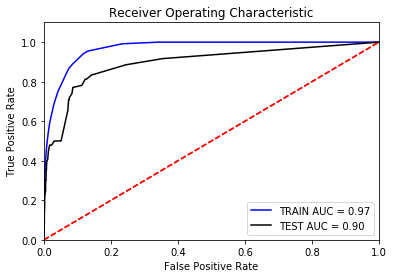

In [5]:
# training
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

# test
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc_2 = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k', label = 'TEST AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## <font color="red"> Now, let's see if an ensemble can solve the issue

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, oob_score=False, n_estimators=40, criterion='gini', max_depth=7,\
                            min_samples_leaf=10, min_samples_split=20, \
                            max_features=None, random_state=0)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# predict
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [8]:
print('training recall: {}'.format(recall_score(y_true=y_train, y_pred=y_pred_train)))
print('test recall: {}'.format(recall_score(y_true=y_test, y_pred=y_pred)))

training recall: 0.379746835443038
test recall: 0.375


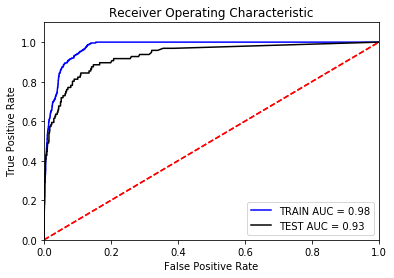

In [9]:
# training
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

# test
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc_2 = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k', label = 'TEST AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()